In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


# Any results you write to the current directory are saved as output.
df_train = pd.read_csv("train.csv")[:1000]
df_test = pd.read_csv("test.csv")[:1000]

y_train = df_train.iloc[:, :1]

X_train =df_train.iloc[:, 1:]
X_test =df_test.iloc[:, 0:]
print(X_train.head())
print(X_test.head())

#print(X_train.ix[0].reshape(28,28))

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

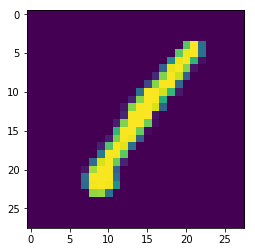

label    1
Name: 0, dtype: int64


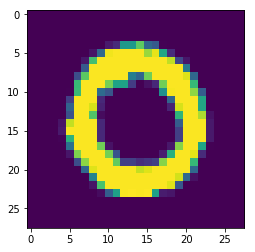

label    0
Name: 1, dtype: int64


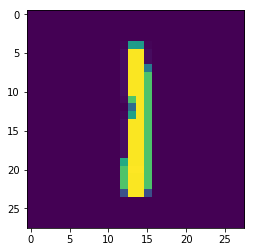

label    1
Name: 2, dtype: int64


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


for i in range(3):
    sample_image = np.array(X_train.loc[i]).reshape(28,28)
    plt.imshow(sample_image)
    plt.show()
    print(y_train.loc[i])

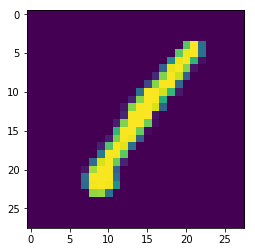

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


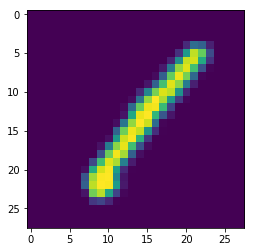

In [5]:
#rotating image
import random
from skimage.transform import rotate
from PIL import Image

from scipy import misc
images = []
images_label=[]
for i in range(10):
    images.append(np.array(X_train.loc[i]).reshape(28,28))
    images_label.append(y_train.loc[i])
#random images to choose

plt.imshow(images[0])
plt.show()

def random_rotate(image):   
     angle = np.random.uniform(low=-3.0, high=3.0)
     image = rotate(image, angle, 'bicubic') 
     img = Image.fromarray(image)
     left, top, right, bottom = 0,0,28,28
     cropped = np.array(img.crop( ( left, top, right, bottom ) ))     
     return cropped

newimg = random_rotate(images[0])
plt.imshow(newimg)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


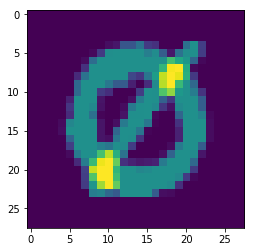

In [6]:
#example of combining images
from PIL import Image
from scipy import misc

im1 = misc.toimage(images[0])
im2 = misc.toimage(images[1])
alpha=0.5
im3 = Image.blend(im1, im2, alpha)
im3 = np.array(im3)
plt.imshow(im3)

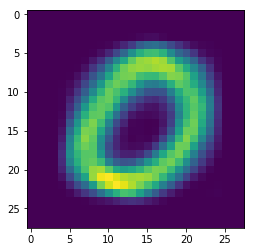

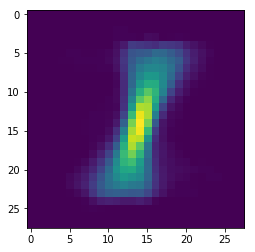

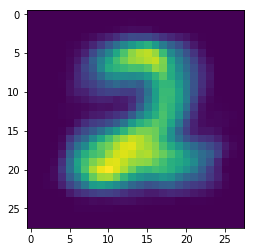

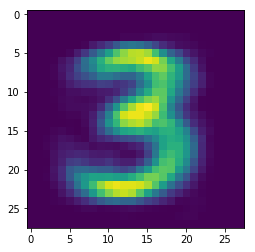

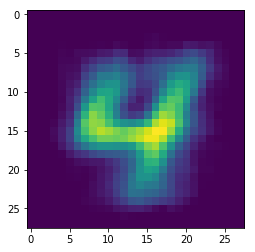

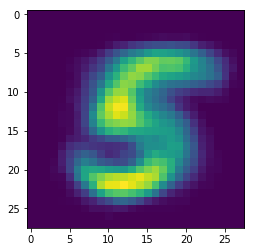

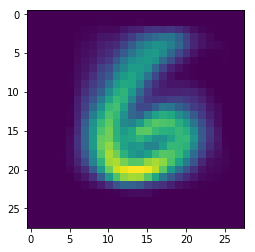

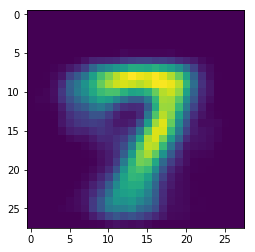

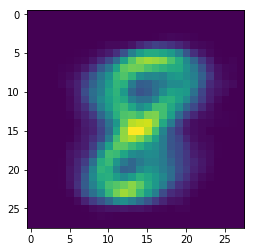

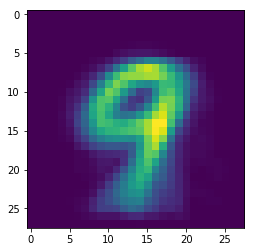

In [7]:
#getting mean images frome the digits
digit_means=[]
label_means =[]
for digit in range(10):
    digit_mean=np.zeros(784)
    df_digit = df_train[df_train["label"]==digit]
    X_digit = df_digit.iloc[:, 1:]
    
    for row in X_digit.as_matrix():
        
        digit_mean+=row

    digit_mean/=784
    digit_means.append(digit_mean)

    plt.imshow(digit_means[digit].reshape(28,28))
    plt.show()

In [8]:
mean_blend =[]
y_blend =[]
alpha = 0.5
for digit in range(10):
    m_digit = misc.toimage(digit_means[digit].reshape(28,28))
    df_digit = df_train[df_train["label"]==digit]
    X_digit = df_digit.iloc[:, 1:]
    for row in X_digit.as_matrix():
        img =misc.toimage(row.reshape(28,28))
        new_img = np.array(Image.blend(img,m_digit,alpha))
        mean_blend.append(new_img.flatten())
        y_blend.append(digit)
        
#sample = np.array(mean_blend[0])
#plt.imshow(sample)
df_blend = pd.DataFrame(mean_blend,columns=X_train.columns)
df_blend["label"]=y_blend
print(df_blend[:10])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   pixel9  ...    pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...           0         0         0         0         0      

In [9]:
#adding lots of rotated images to our dataset
rotated_images =[]
flatten_images_rotated=[]

for image in images:
    rimage = random_rotate(image)
    rotated_images.append(rimage)
    flatten_images_rotated.append(rimage.flatten()[:784])
#print(len(flatten_images[5]))
df_rotate = pd.DataFrame(flatten_images_rotated[:100],columns =X_train.columns).fillna(0.0)
X_new_blend = pd.DataFrame(mean_blend[:100],columns=X_train.columns)

X_new = pd.concat([df_rotate,X_train,X_new_blend],ignore_index=True)
il_df = pd.DataFrame(images_label)

df_blend["label"]=y_blend
y_blend_label = pd.DataFrame(y_blend,columns=["label"])

y_new = pd.concat([y_train,il_df,y_blend_label],ignore_index=True)
print("finished adding rotated and blendet data")

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


finished adding rotated and blendet data


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import itertools
from sklearn.metrics import confusion_matrix
from sklearn import svm

from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)

In [11]:
# sum and variance of pixelseries

pixelsum = []
pixelvar =[]
for x in X_new.as_matrix():
    pixelsum.append(sum(x))
    pixelvar.append(np.var(x))

X_new["sum"]=pixelsum
X_new["var"]=pixelvar
print(X_train.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


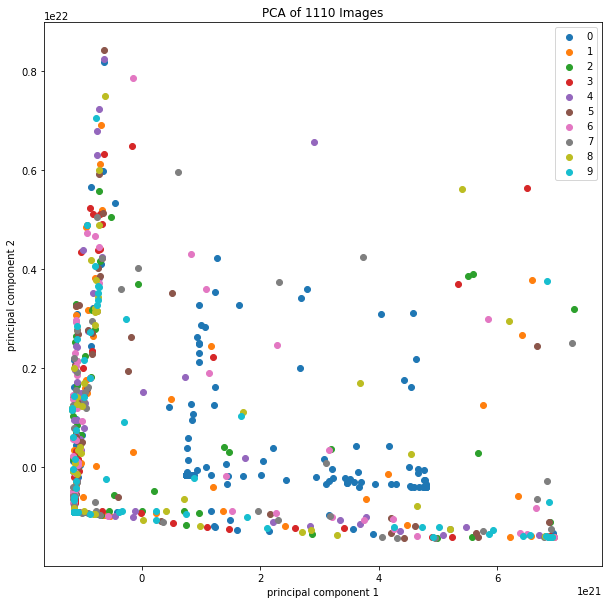

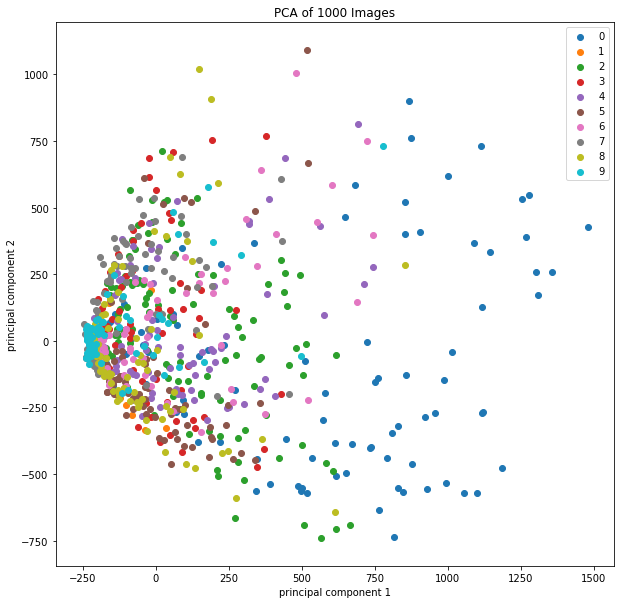

In [12]:
from sklearn import preprocessing

def pca_from_data(X,y):
    scaler = preprocessing.RobustScaler().fit(X)
    X = scaler.transform(X) 

    pca = PCA(n_components=2)
    pca_2d = pca.fit_transform(X)
    pca_df = pd.DataFrame(data = pca_2d
                 , columns = ['principal component 1', 'principal component 2'])
    pca_df["label"]=y
    labels = np.unique(y)
    print(labels)
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    n_images = len(X)
    plt.title("PCA of "+str(n_images)+" Images")
    plt.xlabel("principal component 1")
    plt.ylabel("principal component 2")
    for label in labels:
        df = pca_df[pca_df["label"]==label]
        ax1.scatter(df["principal component 1"],df["principal component 2"],label = str(label))

    plt.legend()
pca_from_data(X_new,y_new)
pca_from_data(X_train,y_train)

In [13]:
import warnings
warnings.filterwarnings("ignore")

#little help function to measure accuracy
def predict_acc(X_test,y_test,clf):
    predictions=[]       
    for x in X_test.as_matrix(): 
    
        predictions.append(float(clf.predict([x])))   
    
    acc = accuracy_score(y_test, predictions)
    return [acc,predictions]